**Thanks to:**
* [Gradient Descent and Cost Function](https://www.youtube.com/watch?v=vsWrXfO3wWw&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=4)
* [Gradient Descent Algorithm](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)
* [Fighting Overfitting With L1 or L2 Regularization](https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization)
* [Mean Squared Error](https://www.ml-science.com/mean-squared-error)
* [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

# 1. Description
## 1.1 Gradient Descent without regularization
**Gradient Descent** is a first-order optimization algorithm. It involves taking steps in the opposite direction of the gradient in order to find the **global minimum** (or *local minimum in non-convex functions*) of the objective function.<br>
The image below provides a great illustration of how **Gradient Descent** takes steps towards the **global minimum** of a convex function.
##### <br>
By iteratively updating the model’s parameters in the *negative gradient direction,* **gradient descent** *gradually converges towards the optimal set of parameters that yields the* **lowest cost.** <br>
The **learning rate,** a **hyperparameter,** determines the **step size** taken in each iteration, influencing the speed and stability of convergence.

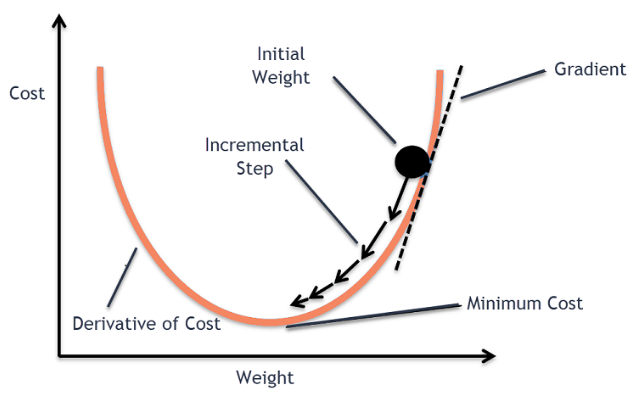

## 1.2 Mean Squared Error (MSE)
**Mean squared error (MSE)** measures error in statistical models by using the *average squared difference between **observed** and **predicted** values.*

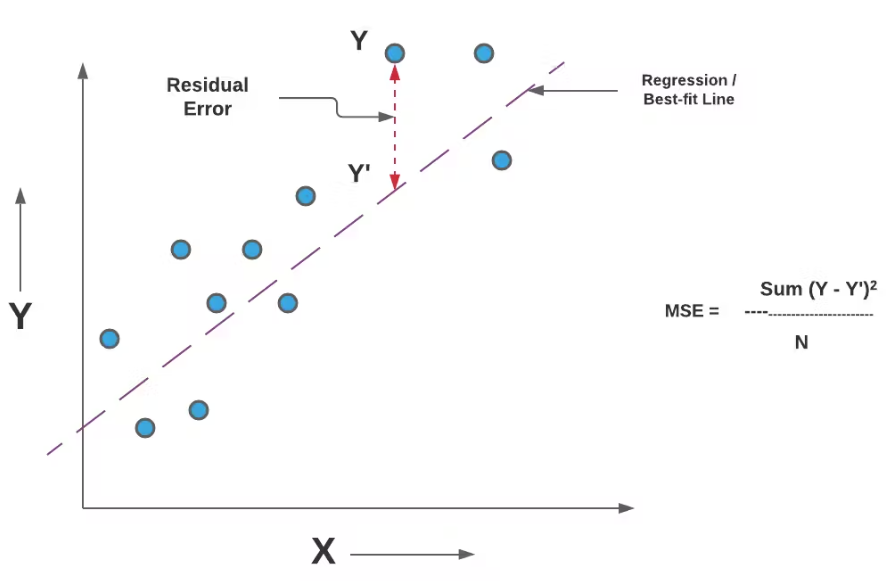

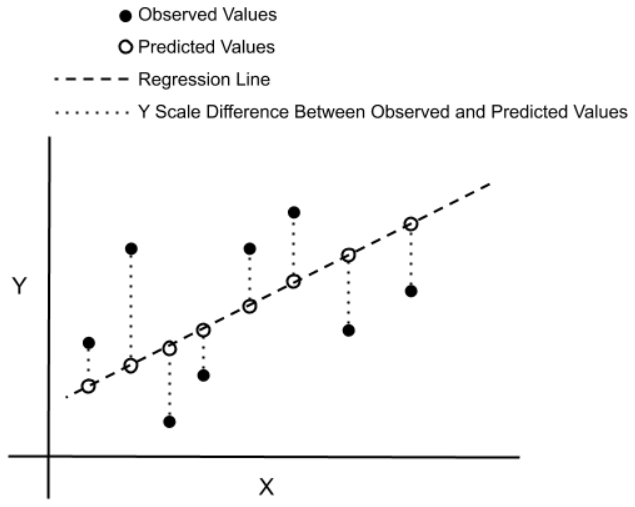

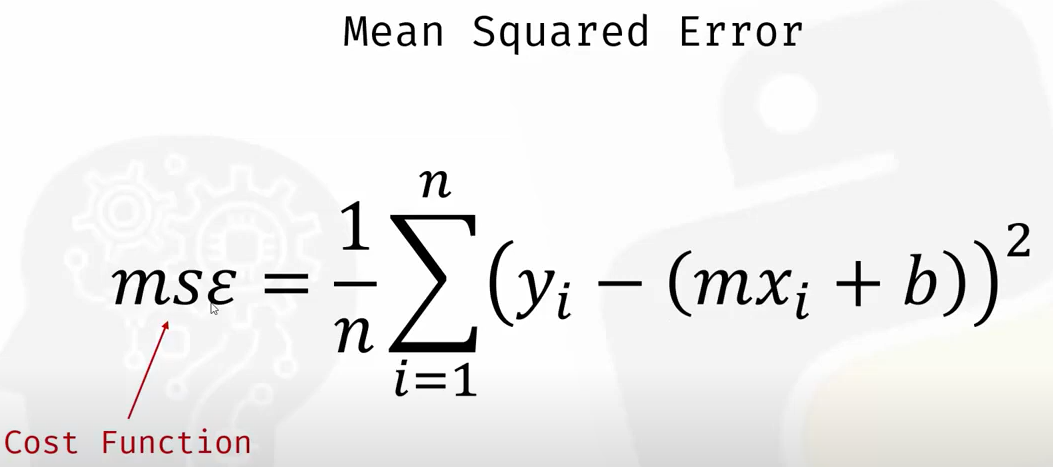


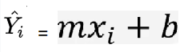

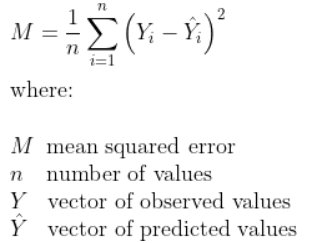

## 2. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

## 3. MSE - Mean Squared Error, function definition

In [2]:
def mse(y_true, y_pred):

  # determine the cost
  mse = sum([val **2 for val in (y_true - y_pred)]) / len(y_true)
  return mse

# Partial derivative of coefficient and intercept

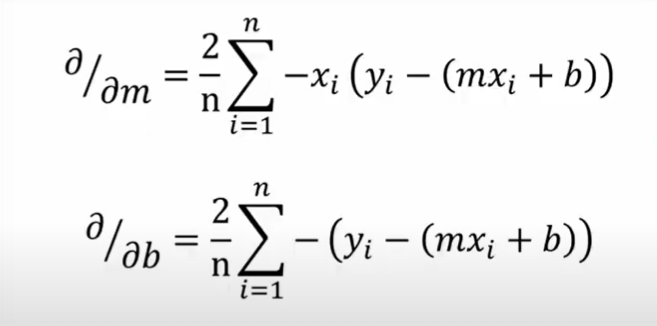

# Learning rate change
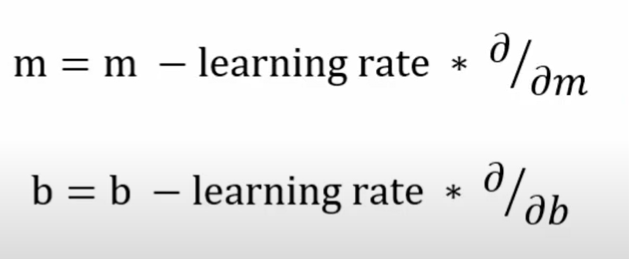

## 4. Gradient Descent Algorithm function implementation to perform linear regression.

In [3]:
def gradient_descent(x, y):

  # Initialize parameters slope and intercept of the line and mse
  m_curr = b_curr = mse_old = 0.0

  # number of iterations to perform.
  iterations = 10000
  n = len(x)
  y_true = y

  # learning rate, to control parameters in each iteration.
  learning_rate = 0.08

  for i in range(iterations):

    # Calculate the predicted values
    y_pred = m_curr * x + b_curr

    # Plot the prediction line
    plt.plot(x, y_pred, color='green')

    # Compute the Mean Squared Error (MSE)
    mse = (1/n) * np.sum((y_true - y_pred) ** 2)

    # Check for convergence by comparing the new MSE with the old one
    if(math.isclose(mse_old, mse, abs_tol=0.001)):
      break
    mse_old = mse

    # Compute the partial derivatives
    part_mCurr = (-2/n)*sum(x * (y_true - y_pred))
    part_bCurr = (-2/n)*sum(y_true - y_pred)

    # Update the parameters
    m_curr = m_curr - learning_rate * part_mCurr
    b_curr = b_curr - learning_rate * part_bCurr

    # Print the progress
    print('m {},b {},mse {},iteration {}'.format(m_curr, b_curr, mse, i))

  # Plot the final prediction line
  plt.plot(x, y_pred, color='blue')

##Explanation
###Initialization:
1. m_curr and b_curr are the initial guesses for the slope and intercept of the line, respectively, both set to 0.
2. mse_old is initialized to 0.0 to keep track of the Mean Squared Error (MSE) from the previous iteration.
3. iterations is set to 10000, which is the maximum number of iterations to perform.
4. n is the number of data points in x.
5. y_true is simply a reference to y, which contains the true values of the dependent variable.
6. learning_rate is set to 0.08, which controls how much to adjust the parameters in each iteration.

###Iteration Loop:
1. Predicted Values (y_pred): The predictions are calculated using the current values of m_curr and b_curr.
2. Plotting: The current prediction line is plotted in green for visualization purposes.
3. MSE Calculation: The mean squared error is computed to evaluate the performance of the model.
4. Convergence Check: The loop breaks if the change in MSE between iterations is less than 0.001, indicating convergence.
5. Partial Derivatives: These are calculated with respect to m_curr and b_curr to determine the direction and magnitude of the update.
    5.1. part_mCurr is the partial derivative of the MSE with respect to m_curr.
    5.2. part_bCurr is the partial derivative of the MSE with respect to b_curr.
6. Parameter Update: The parameters m_curr and b_curr are updated by subtracting the product of the learning rate and their respective partial derivatives.
7. Progress Print: The current values of m_curr, b_curr, mse, and the iteration count are printed to track progress.

###Final Plot:
1. After the loop, the final prediction line is plotted in blue.

##Key Concepts
1. Gradient Descent: An optimization algorithm used to minimize the MSE by iteratively updating the parameters (m_curr and b_curr) in the direction of the steepest descent of the error surface.
2. Learning Rate: A hyperparameter that controls how much to adjust the parameters in each iteration.
3. Mean Squared Error (MSE): A metric to measure the average squared difference between the actual values and the predicted values. Minimizing the MSE leads to a better fitting line.

This function effectively fits a line to the data points (x, y) using linear regression with gradient descent.








## 5. Load Data

In [4]:
# upload the house price dataset
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_3_Gradient_Descent_and_Cost_Function/ML_3_housing.csv"
df = pd.read_csv(url)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 6. Model Creation and Dataset training

Text(0.5, 1.0, 'area vs price')

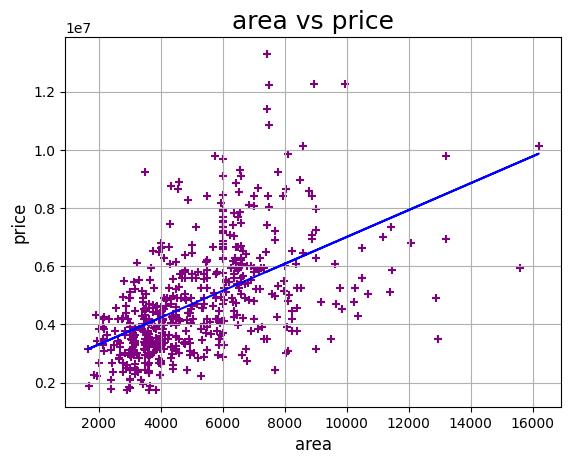

In [5]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(df[['area']], df.price)
plt.plot(df.area, model.predict(df[['area']]), color='blue')
plt.xlabel('area', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.scatter(df.area, df.price, marker='+', color='purple')
plt.grid()
plt.title('area vs price', fontsize=18)

## 7. Dataset EDA (Exploratory Data Analysis)

In [6]:
df.area
np.array(df.area)

array([ 7420,  8960,  9960,  7500,  7420,  7500,  8580, 16200,  8100,
        5750, 13200,  6000,  6550,  3500,  7800,  6000,  6600,  8500,
        4600,  6420,  4320,  7155,  8050,  4560,  8800,  6540,  6000,
        8875,  7950,  5500,  7475,  7000,  4880,  5960,  6840,  7000,
        7482,  9000,  6000,  6000,  6550,  6360,  6480,  6000,  6000,
        6000,  6000,  6600,  4300,  7440,  7440,  6325,  6000,  5150,
        6000,  6000, 11440,  9000,  7680,  6000,  6000,  8880,  6240,
        6360, 11175,  8880, 13200,  7700,  6000, 12090,  4000,  6000,
        5020,  6600,  4040,  4260,  6420,  6500,  5700,  6000,  6000,
        4000, 10500,  6000,  3760,  8250,  6670,  3960,  7410,  8580,
        5000,  6750,  4800,  7200,  6000,  4100,  9000,  6400,  6600,
        6000,  6600,  5500,  5500,  6350,  5500,  4500,  5450,  6420,
        3240,  6615,  6600,  8372,  4300,  9620,  6800,  8000,  6900,
        3700,  6420,  7020,  6540,  7231,  6254,  7320,  6525, 15600,
        7160,  6500,

In [7]:
df.price
np.array(df.price)

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [8]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
y

array([ 5,  7,  9, 11, 13])

## 8. Data Visualization (Gradient Descent)

m 4.96,b 1.44,mse 89.0,iteration 0
m 0.4991999999999983,b 0.26879999999999993,mse 71.10560000000002,iteration 1
m 4.451584000000002,b 1.426176000000001,mse 56.8297702400001,iteration 2
m 0.892231679999997,b 0.5012275199999995,mse 45.43965675929613,iteration 3
m 4.041314713600002,b 1.432759910400001,mse 36.35088701894832,iteration 4
m 1.2008760606719973,b 0.7036872622079998,mse 29.097483330142282,iteration 5
m 3.7095643080294423,b 1.4546767911321612,mse 23.307872849944438,iteration 6
m 1.4424862661541864,b 0.881337636696883,mse 18.685758762535738,iteration 7
m 3.4406683721083144,b 1.4879302070713722,mse 14.994867596913156,iteration 8
m 1.6308855378034224,b 1.0383405553279617,mse 12.046787238456794,iteration 9
m 3.2221235247119777,b 1.5293810083298451,mse 9.691269350698109,iteration 10
m 1.7770832372205707,b 1.1780607551353204,mse 7.8084968312098315,iteration 11
m 3.0439475772474127,b 1.5765710804477953,mse 6.302918117062937,iteration 12
m 1.8898457226770244,b 1.3032248704973899,mse 5.09

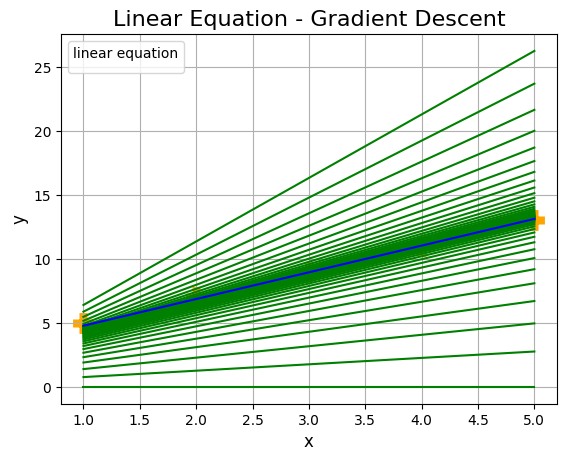

In [9]:
%matplotlib inline
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x, y, marker='+', color='orange', linewidths=15)
plt.grid()
plt.title('Linear Equation - Gradient Descent', fontsize=16)
plt.legend(title='linear equation')
gradient_descent(x, y)
#gradient_descent(np.array(df.area), np.array(df.price))